In [7]:
import numpy as np
from scipy.optimize import root
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

# Problem 1

In [2]:
def linearized_init(M, m, l, q1, q2, q3, q4, r):
    '''
    Parameters:
    ----------
    M, m: floats
          masses of the rickshaw and the present
    l   : float
          length of the rod
    q1, q2, q3, q4, r : floats
        relative weights of the position and velocity of the rickshaw, the
        angular displacement theta and the change in theta, and the control


    Return
    -------
    A : ndarray of shape (4,4)
    B : ndarray of shape (4,1)
    Q : ndarray of shape (4,4)
    R : ndarray of shape (1,1)
    '''
    # Gravity constant
    g = 9.8
    
    # A, B, Q and R matrices as described in the lab manual
    A = np.array([[0,1,0,0],[0,0,m*g/M,0],[0,0,0,1],[0,0,(g/(M*l))*(M+m),0]])
    
    B = np.array([[0,1/M,0,1/(M*l)]]).reshape(4,1)
    
    Q = np.diag([q1,q2,q3,q4])
    
    R = np.array([r]).reshape(-1,1)
    
    return A,B,Q,R

In [8]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
A,B,Q,R = linearized_init(M, m, l, q1, q2, q3, q4, r)

# Problem 2

In [9]:
def find_P(A,B,Q,Rinv):
    '''
    Parameters:
    ----------
    A, B, Q : ndarrays of shape (4,4)
    R : ndarray of shape (1,1)
    
    Returns
    -------
    P : the matrix solution of the Riccati equation
    '''
    # Function to construct equation (20.10) from manual
    def func(P):
        P = P.reshape(4,4)
        out = P @ A + A.T @ P + Q - P @ B @ Rinv @ B.T @ P
        return out.reshape(16)
    
    # Find zeros of func(P) equation with initial guess of 1s
    x0 = np.ones((4,4)).reshape(16)
    out = root(func,x0)
    return out.x.reshape(4,4)

In [10]:
Rinv = 1/R
P = find_P(A,B,Q,1/R)
term = A - B@Rinv@B.T@P
vals,vects = np.linalg.eig(term)
vals
# 1 positive eigval
# will Z->0 ???

array([-1.72875212+0.j        , -0.07538846+0.07490226j,
       -0.07538846-0.07490226j,  1.72530814+0.j        ])

# Problem 3

In [11]:
def rickshaw(tv, X0, A, B, Q, R_inv, P):
    '''
    Parameters:
    ----------
    tv : ndarray of time values, with shape (n+1,)
    X0 : initial conditions on state variables
    A, B, Q : ndarrays of shape (4,4)
    R_inv : ndarray of shape (1,1), inverse of R
    P : ndarray of shape (4,4)
    
    Returns
    -------
    Z : ndarray of shape (n+1,4), the state vector at each time
    U : ndarray of shape (n,), the control values
    '''
    # Equation (20.11) for manual
    def func(Z,t):
        term = A - B @ R_inv @ B.T @P
        return term @ Z
    
    # Find solution to (20.11) using odeint
    Z = odeint(func, X0, tv)
    U = np.array([-R_inv @ B.T @ P @ Z[i] for i in range(Z.shape[0])])
    return Z,U
    

# Problem 4

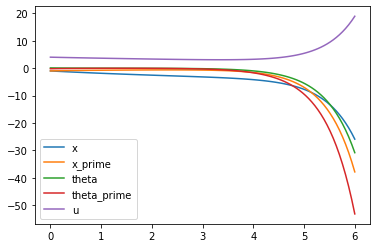

In [13]:
#Test the function from Problem 3 with the following inputs
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
tf1 = 6
tf2 = 60
X0 = np.array([-1., -1., .1, -.2])

# Find the matrix P and plot the solutions.
A,B,Q,R = linearized_init(M, m, l, q1, q2, q3, q4, r)
R_inv = 1/R
P = find_P(A,B,Q,R_inv)
tv = np.linspace(0,tf1,100)

Z,U = rickshaw(tv, X0, A, B, Q, R_inv, P)

plt.plot(tv,Z[:,0],label='x')
plt.plot(tv,Z[:,1],label='x_prime')
plt.plot(tv,Z[:,2],label='theta')
plt.plot(tv,Z[:,3],label='theta_prime')
plt.plot(tv,U     ,label='u')
plt.legend()
plt.show()

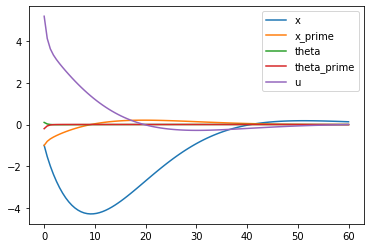

In [14]:
#Test the function from Problem 3 with the following inputs
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
tf1 = 6
tf2 = 60
X0 = np.array([-1., -1., .1, -.2])

#Find the matrix P and plot the solutions
A,B,Q,R = linearized_init(M, m, l, q1, q2, q3, q4, r)
R_inv   = 1/R
P       = solve_continuous_are(A,B,Q,R)
tv      = np.linspace(0,tf2,100)

Z,U = rickshaw(tv, X0, A, B, Q, R_inv, P)

plt.plot(tv,Z[:,0],label='x')
plt.plot(tv,Z[:,1],label='x_prime')
plt.plot(tv,Z[:,2],label='theta')
plt.plot(tv,Z[:,3],label='theta_prime')
plt.plot(tv,U     ,label='u')
plt.legend()
plt.show()